# Descrição do Projeto

Este projeto utiliza dados históricos de preços de ações da Honda Motor Co (HMC) entre 01 de janeiro de 2020 e 01 de maio de 2024 para analisar o desempenho e as tendências dessas ações. Com o objetivo de simplificar a manipulação e análise desses dados, a biblioteca pandasql é empregada, permitindo consultas em estilo SQL em DataFrames pandas.

O conjunto de dados abrange uma ampla gama de informações relevantes, incluindo os preços diários de abertura, alta, baixa e fechamento das ações da Honda Motor Co, bem como os preços e o volume de fechamento ajustados. Por meio desses dados, diversas análises são conduzidas, como a identificação de tendências ao longo do período, o cálculo de métricas de desempenho, a investigação de padrões sazonais e a avaliação de correlações entre diferentes variáveis.

Ao combinar os recursos da biblioteca pandasql com os dados disponíveis, este projeto visa fornecer insights valiosos sobre o comportamento do mercado de ações da Honda Motor Co ao longo do tempo. Essas análises podem ser úteis para investidores e analistas na tomada de decisões informadas e na formulação de estratégias de investimento mais sólidas.

### Descrição dos Dados

* Date (Data)
* Preço de abertura (Open)
* Preço máximo (High)
* Preço mínimo (Low)
* Preço de fechamento (Close)
* Preço de fechamento ajustado (Adj Close)
* Volume de negociações (Volume)

## Importando  Bibliotecas 

In [1]:
!pip install pandasql
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando Dataset

In [2]:
df = pd.read_csv('HMC.csv')

## Exploração Inicial dos Dados

In [3]:
# Verificando a Estrutura

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28.600000,28.650000,28.459999,28.639999,26.480253,262800
1,2020-01-03,28.250000,28.379999,28.080000,28.129999,26.008713,663600
2,2020-01-06,27.719999,28.059999,27.719999,28.049999,25.934746,463000
3,2020-01-07,28.389999,28.389999,28.180000,28.209999,26.082678,341800
4,2020-01-08,27.990000,28.219999,27.990000,28.129999,26.008713,264200


In [4]:
# Verificando a Dimensão 

df.shape

(1089, 7)

In [5]:
# Verificar os tipos de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1089 non-null   object 
 1   Open       1089 non-null   float64
 2   High       1089 non-null   float64
 3   Low        1089 non-null   float64
 4   Close      1089 non-null   float64
 5   Adj Close  1089 non-null   float64
 6   Volume     1089 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 59.7+ KB


In [6]:
# Verificar valores ausentes

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# Resumo Estatístico 

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1.089000e+03
mean,28.221478,28.398834,28.030459,28.218999,27.471148,9.757522e+05
std,3.609212,3.597729,3.621967,3.610751,3.811920,4.494060e+05
min,20.000000,20.120001,19.379999,19.860001,18.362356,2.097000e+05
25%,25.379999,25.540001,25.260000,25.389999,24.440861,6.740000e+05
50%,28.170000,28.330000,27.969999,28.180000,26.965633,9.086000e+05
75%,30.740000,30.920000,30.570000,30.740000,30.196468,1.196400e+06
max,37.660000,37.900002,37.599998,37.680000,37.680000,3.950600e+06


In [8]:
# Verificar valores únicos

df.nunique()

Date         1089
Open          733
High          726
Low           741
Close         745
Adj Close     955
Volume       1040
dtype: int64

In [9]:
# Conversão de datas

df['Date'] = pd.to_datetime(df['Date'])

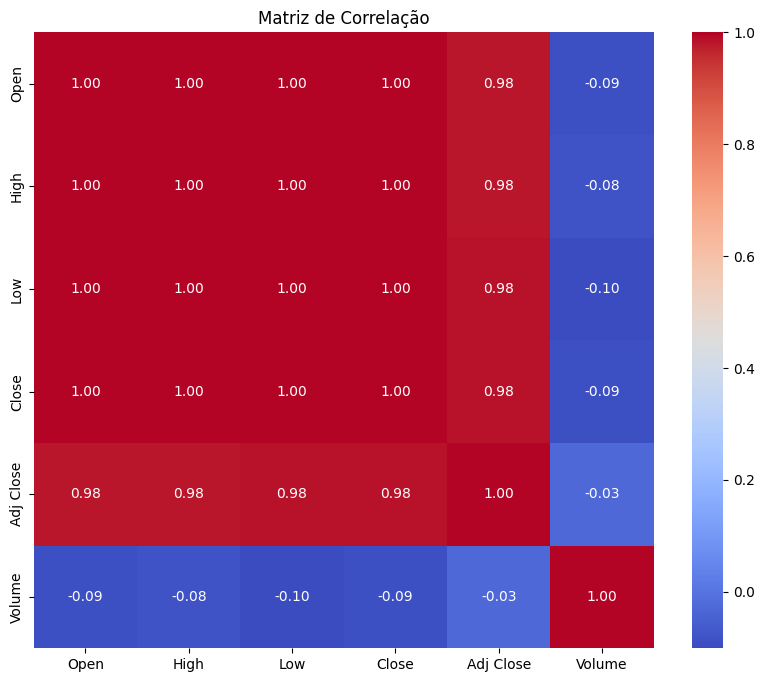

In [10]:
# Correlação entre as variáveis 

correlation_matrix = df.corr()

# Plot

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


## Perguntas de Negócio 

1_ Qual o preço de fechamento médio das ações da Honda Motor durante o período?

In [11]:
query1 = """

SELECT 
    AVG(Close) as Media_Preco_Fechamento
FROM df
WHERE Date >= DATE('now', '-4 year');
"""

resultado = sqldf(query1)

print(resultado)

   Media_Preco_Fechamento
0               28.609227


* Insight: A consulta oferece uma medida central dos preços de fechamento das ações da Honda Motor em um intervalo de 4 anos. Essa informação possibilita uma compreensão abrangente das tendências de preço ao longo desse período, sendo útil para análises de desempenho, comparações históricas e tomada de decisões de investimento.


2_ Qual foi o preço máximo atingido pelas ações da Honda Motor durante todo o período analisado?

In [12]:
query2 = """ SELECT Max (High) as Preco_Maximo FROM df """

resultado2 = sqldf(query2)

print(resultado2)

   Preco_Maximo
0     37.900002


* Insight: Descobrir o preço máximo alcançado durante o período é crucial para compreender o comportamento dos preços das ações da Honda Motor ao longo da análise. Esse valor representa o ponto mais alto atingido pelas ações, fornecendo uma perspectiva sobre seu potencial de valorização e indicando níveis de resistência significativos no mercado.

3_  Qual foi o preço mínimo atingido pelas ações da Honda Motor durante todo o período analisado?

In [13]:
query8 = """
SELECT Min (High) as Preco_Mínimo FROM df """

resultado8 = sqldf(query8)

print(resultado8)

   Preco_Mínimo
0     20.120001


* Insight: Entender os valores mínimos que as ações atingem é crucial para compreender a volatilidade do mercado de ações. Esse conhecimento permite identificar pontos de suporte, avaliar o risco de desvalorização e formular estratégias de investimento mais eficazes. Além disso, fornece um contexto histórico importante para prever possíveis reações do mercado a eventos futuros. A identificação dos preços mínimos também auxilia na gestão de riscos e na tomada de decisões informadas, garantindo uma abordagem mais robusta e resiliente ao lidar com a dinâmica do mercado financeiro.

4_ Quais foram os cinco dias com os maiores volumes de negociações durante o período analisado?

In [14]:
query4 = """ 
SELECT Date, Volume FROM df
ORDER BY Volume Desc
LIMIT 5 """

resultado4 = sqldf(query4)

print(resultado4)

                         Date   Volume
0  2021-02-24 00:00:00.000000  3950600
1  2020-05-26 00:00:00.000000  3942500
2  2020-05-28 00:00:00.000000  3798600
3  2024-03-20 00:00:00.000000  3765800
4  2021-04-29 00:00:00.000000  3718600


*Insight: Entender os dias de maior volume de negociação é fundamental para compreender os eventos que impulsionam o aumento das transações, o que, por sua vez, é crucial para compreender os comportamentos futuros no mercado de ações. 

5_ Qual foi a média dos preços de fechamento das ações da Honda Motor Co durante cada mês do período analisado?

In [15]:
query5 = """
SELECT strftime('%Y-%m', Date) AS Mes, AVG(Close) AS Media_Preco_Fechamento
FROM df
GROUP BY strftime('%Y-%m', Date)
"""

resultado5 = sqldf(query5)

print(resultado5)

        Mes  Media_Preco_Fechamento
0   2020-01               27.461904
1   2020-02               26.542105
2   2020-03               22.924091
3   2020-04               22.118095
4   2020-05               23.898500
5   2020-06               26.754091
6   2020-07               25.758636
7   2020-08               25.416667
8   2020-09               24.690000
9   2020-10               24.254091
10  2020-11               27.670000
11  2020-12               29.131363
12  2021-01               27.680000
13  2021-02               28.408947
14  2021-03               29.979565
15  2021-04               30.147619
16  2021-05               30.543500
17  2021-06               32.434546
18  2021-07               31.866667
19  2021-08               31.615000
20  2021-09               30.916667
21  2021-10               30.157143
22  2021-11               29.040000
23  2021-12               28.108636
24  2022-01               29.749000
25  2022-02               30.588947
26  2022-03               28

Insight: Entender essa métrica é crucial para obter uma visão mensal do desempenho das ações, o que permite identificar padrões sazonais, tendências de mercado e flutuações nos preços.

6 _ Houve alguma tendência de alta ou baixa nos preços de fechamento ajustados das ações da Honda Motor ao longo do tempo?

In [16]:
query6 = """ SELECT Date, AVG(`Adj Close`) as Media_Preco_Fechamento_Ajustado FROM df GROUP BY Date """

# Executando a query
resultado5 = sqldf(query6)

# Calcular a tendência
tendencia = pd.Series(resultado5['Media_Preco_Fechamento_Ajustado']).diff().mean()

# Analisar os resultados
if tendencia > 0:
    print("Houve uma tendência de alta nos preços de fechamento ajustados das ações da Honda Motor ao longo do tempo.")
elif tendencia < 0:
    print("Houve uma tendência de baixa nos preços de fechamento ajustados das ações da Honda Motor ao longo do tempo.")
else:
    print("Não houve uma tendência clara nos preços de fechamento ajustados das ações da Honda Motor ao longo do tempo.")

Houve uma tendência de alta nos preços de fechamento ajustados das ações da Honda Motor ao longo do tempo.


* Insight: Esta análise sugere uma tendência de alta nos preços de fechamento ajustados das ações ao longo do período analisado, fornecendo indicações valiosas sobre tendências do mercado. 

7_ Verifique se há relação entre o preço de fechamento e o preços máximo das ações da Honda Motor em durante o último ano analisado?

In [17]:
query7 = """
SELECT AVG(Close) as Media_Preco_Fechamento, AVG(High) as Media_Preco_Maximo
FROM df
WHERE Date >= DATE('now', '-1 year')
"""

resultado7 = sqldf(query7)

print(resultado7)

   Media_Preco_Fechamento  Media_Preco_Maximo
0               32.781184           32.942675


* Insight: Essa consulta permite comparar a média dos preços de fechamento e dos preços máximos das ações. Com isso, é possível compreender o comportamento dos preços das ações ao longo do período, facilitando uma avaliação geral do desempenho das ações nesse intervalo de tempo específico.

8_ Quais foram os dias com as maiores variações percentuais nos preços de fechamento das ações da Honda Motor durante o período analisado? 

In [18]:
query8 = """
SELECT Date, Close, ((Close - LAG(Close, 1) 
OVER (ORDER BY Date)) / LAG(Close, 1) OVER (ORDER BY Date)) * 100 AS Variacao_Percentual
FROM df
ORDER BY Variacao_Percentual DESC
LIMIT 5
"""
resultado8 = sqldf(query8)

print(resultado8)

                         Date      Close  Variacao_Percentual
0  2020-05-26 00:00:00.000000  25.990000            10.080470
1  2020-03-24 00:00:00.000000  21.740000             9.466258
2  2020-04-06 00:00:00.000000  21.480000             8.157094
3  2020-04-17 00:00:00.000000  22.629999             7.710609
4  2022-08-10 00:00:00.000000  26.790001             7.202885


* Insight: A análise revela os dias com as maiores variações percentuais nos preços de fechamento das ações da Honda Motor ao longo do período analisado. Contudo, esses dias podem indicar eventos impactantes no mercado, fornecendo informações cruciais sobre a volatilidade. 